#### Bank Customer Churn Prediction(Previsão de rotatividade de clientes bancários)

**Etapas:**
* 1 - Definir o Problema de Negócio
* 2 - Coletar os Dados e Obter uma Visão Geral
* 3 - Análise Exploratória dos Dados (AED)
* 4 - Dividir os Dados em Conjuntos de Treino e Teste
* 5 - Engenharia de Features, Limpeza de Dados e Pré-processamento
* 6 - Treinamento e Comparação de Modelos, Otimização
* 7 - Teste e Avaliação do Modelo de Produção Final
* 8 - Concluir e Interpretar os Resultados

In [4]:
import pandas as pd
import numpy as np

# Importanto Biblioteca para dividir o conjunto de dados.
from sklearn.model_selection import train_test_split

# Importanto Biblioteca para visualizações.
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca One-Hot Encoding.
from sklearn.preprocessing import OneHotEncoder

# Importanto Biblioteca para escalonamento.
from sklearn.preprocessing import RobustScaler

In [5]:
# Importando o dataset.
df = pd.read_csv('BankChurners.csv')

In [6]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)

####  4 - Dividir os Dados em Conjuntos de Treino e Teste

Separar a variável dependente e as variáveis independentes.

In [7]:
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df.Attrition_Flag

Utilizando o train_test_split para separar o conjunto de dados.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  5 - Engenharia de Features, Limpeza de Dados e Pré-processamento

* No dataset, identificamos valores "Unknown" (Desconhecidos) nas colunas Education_Level, Marital_Status, e Income_Category. Optamos por manter esses valores inalterados, pois sua exclusão ou modificação poderia impactar significativamente a análise. Preservar esses dados na forma original é fundamental para garantir a integridade da distribuição e evitar a introdução de viés que poderia influenciar os resultados do modelo.
* Alterações serão feitas no dataset, e como o dataset já está divido, irei aplicar as alterações na base de treino e na base de teste.


Separando a coluna Customer_Age em faixa etária.

In [9]:
# Criando a Função
def classify_age(Age):
    if Age <= 17:
        return 'Teenager'
    elif Age <= 25:
        return 'Young Adul'
    elif Age <= 40:
        return 'Young Middle-Aged Adult'
    elif Age <= 60:
        return 'Mature Adult'
    elif Age <= 80:
        return 'Senior Adult'
    else: 
        return 'Elderly'  
    
# Criando uma coluna e Aplicando a função criada:
X_train['AgeGroup'] = X_train['Customer_Age'].apply(classify_age)
X_test['AgeGroup'] = X_test['Customer_Age'].apply(classify_age)

* Convertendo as colunas 'Education_Level', 'Income_Category' e 'Card_Category' em variáveis numéricas manualmente, sem utilizar técnicas de encoding, para garantir que sejam transformadas de forma ordinal conforme a ordem desejada.

In [10]:
# Base de treino.
X_train['Education_Level'] = X_train['Education_Level'].replace({
     'Unknown': 0,
     'Uneducated': 1,
     'High School': 2,
     'College': 3,
     'Graduate': 4,
     'Post-Graduate': 5, 
     'Doctorate': 6})
X_train['Income_Category'] = X_train['Income_Category'].replace({
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
    
})

X_train['Card_Category'] = X_train['Card_Category'].replace({
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
})

X_train['AgeGroup'] = X_train['AgeGroup'].replace({
    'Teenager': 0,
    'Young Adul': 1,
    'Young Middle-Aged Adult': 2,
    'Mature Adult': 3,
    'Senior Adult': 4,
    'Elderly': 5 
})

# Base de teste.
X_test['Education_Level'] = X_test['Education_Level'].replace({
     'Unknown': 0,
     'Uneducated': 1,
     'High School': 2,
     'College': 3,
     'Graduate': 4,
     'Post-Graduate': 5, 
                 'Doctorate': 6})
X_test['Income_Category'] = X_test['Income_Category'].replace({
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
    
})

X_test['Card_Category'] = X_test['Card_Category'].replace({
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
})

X_test['AgeGroup'] = X_test['AgeGroup'].replace({
    'Teenager': 0,
    'Young Adul': 1,
    'Young Middle-Aged Adult': 2,
    'Mature Adult': 3,
    'Senior Adult': 4,
    'Elderly': 5 
})

Transformando também a coluna 'Attrition_Flag' em numérica.

In [11]:
# Base de treino.
y_train = y_train.replace({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

# Base de teste.
y_test = y_test.replace({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

Para as colunas 'Gender' e 'Marital_Status' irei utilizar o One-Hot Encoding para transforma-las em variáveis numéricas.

In [12]:
# Inicializar o codificador OneHotEncoder.
oht_Gender = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oht_Marital_Status = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 

# Base de treinamento.
oht_Gender.fit(X_train[['Gender']])
oht_Marital_Status.fit(X_train[['Marital_Status']])

# Transformando os dados:
oht_Gender_encoded_train = oht_Gender.transform(X_train[['Gender']])
oht_Marital_Status_encoded_train = oht_Marital_Status.transform(X_train[['Marital_Status']])

# Convertendo para DataFrame:
oht_Gender_encoded_train_df = pd.DataFrame(oht_Gender_encoded_train, columns=oht_Gender.get_feature_names_out(['Gender']), index=X_train.index)                                                             
oht_Marital_Status_encoded_train_df = pd.DataFrame(oht_Marital_Status_encoded_train, columns=oht_Marital_Status.get_feature_names_out(['Marital_Status']), index=X_train.index)

# Transformando os dados de teste:
oht_Gender_encoded_test = oht_Gender.transform(X_test[['Gender']])
oht_Marital_Status_encoded_test = oht_Marital_Status.transform(X_test[['Marital_Status']])

# Convertendo para DataFrame:
oht_Gender_encoded_test_df = pd.DataFrame(oht_Gender_encoded_test, columns=oht_Gender.get_feature_names_out(['Gender']), index=X_test.index)                                                             
oht_Marital_Status_encoded_test_df = pd.DataFrame(oht_Marital_Status_encoded_test, columns=oht_Marital_Status.get_feature_names_out(['Marital_Status']), index=X_test.index)

# Removendo as colunas categóricas originais:
X_train = X_train.drop(['Gender', 'Marital_Status'], axis=1)
X_test = X_test.drop(['Gender', 'Marital_Status'], axis=1)

# Concatenando os dados codificados com as demais colunas:
X_train = pd.concat([X_train, oht_Gender_encoded_train_df, oht_Marital_Status_encoded_train_df], axis=1)
X_test = pd.concat([X_test, oht_Gender_encoded_test_df, oht_Marital_Status_encoded_test_df], axis=1)


Após a fase de teste de parâmetros e modelos que pode ser acompanhando na próxima etapa, foi constatado que a remoção de determinadas colunas com baixa correlação contribuiu para o aumento do desempenho do modelo. Com base nessa análise, as seguintes colunas serão excluídas antes da realização do escalonamento:
* Dependent_count
* Months_on_book
* Avg_Open_To_Buy
* Customer_Age

In [13]:
X_train = X_train.drop(['Dependent_count', 'Months_on_book', 'Avg_Open_To_Buy', 'Customer_Age'], axis=1)
X_test = X_test.drop(['Dependent_count', 'Months_on_book', 'Avg_Open_To_Buy', 'Customer_Age'], axis=1)

* Optarei por realizar o escalonamento das colunas utilizando o RobustScaler em vez do StandardScaler, devido à presença significativa de outliers no dataset. O RobustScaler é mais adequado para este tipo de dados, pois lida melhor com valores extremos ao utilizar a mediana e o intervalo interquartil, garantindo uma normalização mais robusta.

In [17]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 6 - Treinamento e Comparação de Modelos, Seleção de Features e Otimização

In [19]:
# Importanto bibliotecas para o aprendizado de máquinas.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Importanto biblioteca encontrar melhores parâmetros.
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Importanto bibliotecas para avaliação de precisão.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

Dividindo o conjunto entre treino e validação.

In [20]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

* Treinando alguns modelos com parâmetros padrões.

In [21]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

LogisticRegression = LogisticRegression(max_iter=1000)
LogisticRegression.fit(X_train, y_train)

SVC = SVC()
SVC.fit(X_train, y_train)

MLPClassifier = MLPClassifier(max_iter=1000)
MLPClassifier.fit(X_train, y_train)

Gaussian = GaussianNB()
Gaussian.fit(X_train, y_train)


GaussianNB()

Realizando as previsões com a base de teste.

In [22]:
pred_DecisionTree = DecisionTree.predict(X_val)
pred_RandomForest = RandomForest.predict(X_val) 
pred_KNN = KNN.predict(X_val) 
pred_LogisticRegression = LogisticRegression.predict(X_val) 
pred_SVC = SVC.predict(X_val) 
pred_MLPClassifier = MLPClassifier.predict(X_val) 
pred_Gaussian = Gaussian.predict(X_val) 

Verificando a acurácia.

In [23]:
accuracy_DecisionTree = accuracy_score(y_val, pred_DecisionTree) 
accuracy_RandomForest = accuracy_score(y_val, pred_RandomForest) 
accuracy_KNN = accuracy_score(y_val, pred_KNN) 
accuracy_LogisticRegression = accuracy_score(y_val, pred_LogisticRegression) 
accuracy_SVC = accuracy_score(y_val, pred_SVC)  
accuracy_MLPClassifier = accuracy_score(y_val, pred_MLPClassifier) 
accuracy_Gaussian = accuracy_score(y_val, pred_Gaussian) 

In [24]:
accuracy_models = pd.DataFrame({
    'Model': ['DecisionTree', 'RandomForest', 'KNN', 'LogisticRegression', 'SVC', 'MLPClassifier', 'Gaussian'],
    'Accuracy': [accuracy_DecisionTree, accuracy_RandomForest, accuracy_KNN, accuracy_LogisticRegression, accuracy_SVC, accuracy_MLPClassifier, accuracy_Gaussian]
})

In [25]:
accuracy_models

,Model,Accuracy
0,DecisionTree,0.929056
1,RandomForest,0.959901
2,KNN,0.919803
3,LogisticRegression,0.911166
4,SVC,0.937693
5,MLPClassifier,0.933374
6,Gaussian,0.897594


O modelo em que tivemos a maior acurácia foi o RandomForest(95,9%). Iremos agora analisar a matriz de confusão deste modelo.

In [26]:
print(classification_report(pred_RandomForest, y_val))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1413
           1       0.80      0.91      0.85       208

    accuracy                           0.96      1621
   macro avg       0.90      0.94      0.92      1621
weighted avg       0.96      0.96      0.96      1621



* Próximo passo será tunar o modelo para conseguimos resultados melhores.
* Vou utilizar o BayesSearchCV para otimizar os hiperparâmetros do modelo e, assim, melhorar seu desempenho. Essa abordagem de busca Bayesiana é mais eficiente que a busca em grade tradicional (GridSearchCV), pois explora o espaço dos hiperparâmetros de maneira mais inteligente, focando em regiões promissoras com base em resultados anteriores. Com isso, espero encontrar uma combinação de parâmetros que maximize a precisão e a capacidade de generalização do modelo.

Utilizando o BayesSearchCV.

In [27]:
param_space = {
    'n_estimators': Integer(10, 200),  
    'max_features': Categorical(['sqrt', 'log2']),  
    'max_depth': Integer(1, 20), 
    'min_samples_split': Integer(2, 20),  
    'min_samples_leaf': Integer(1, 20),  
    'bootstrap': Categorical([True, False]) 
}
rf = RandomForestClassifier()
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=50,  
    cv=5,  
    n_jobs=-1,  
    random_state=42  
)

bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
              random_state=42,
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')})

In [28]:
best_params = bayes_search.best_params_
print("Melhores parâmetros encontrados:")
print(best_params)

best_model = bayes_search.best_estimator_

y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Precisão do modelo otimizado: {accuracy}")

Melhores parâmetros encontrados:
OrderedDict([('bootstrap', False), ('max_depth', 18), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])
Precisão do modelo otimizado: 0.9642196175200494


In [29]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1404
           1       0.84      0.91      0.87       217

    accuracy                           0.96      1621
   macro avg       0.91      0.94      0.93      1621
weighted avg       0.97      0.96      0.96      1621



Embora a acurácia geral do modelo não tenha aumentado de forma muito significativa, os novos parâmetros possibilitaram uma redução nos erros ao prever os clientes que abandonaram o serviço, resultando em uma melhora de 4% nos valores de precision para a classe de churn. Essa melhoria é significativa, pois torna o modelo mais preciso e eficaz na identificação de clientes em risco, permitindo uma abordagem mais direcionada para estratégias de retenção.

#### 7 - Teste e Avaliação do Modelo de Produção Final

Agora, aplicarei o modelo Random Forest utilizando os melhores parâmetros identificados para rodar no conjunto de teste.

In [35]:
test_random_forest = RandomForestClassifier(bootstrap=False, 
                                  max_depth=18, 
                                  max_features='log2', 
                                  min_samples_leaf=1, 
                                  min_samples_split=2, 
                                  n_estimators=200)     
test_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=18, max_features='log2',
                       n_estimators=200)

In [36]:
pred_random_forest = test_random_forest.predict(X_test)

In [37]:
pred_random_forest_accuracy = accuracy_score(pred_random_forest, y_test)
pred_random_forest_accuracy

0.9491609081934848

C:\Users\Thais\anaconda3\Anaconda\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


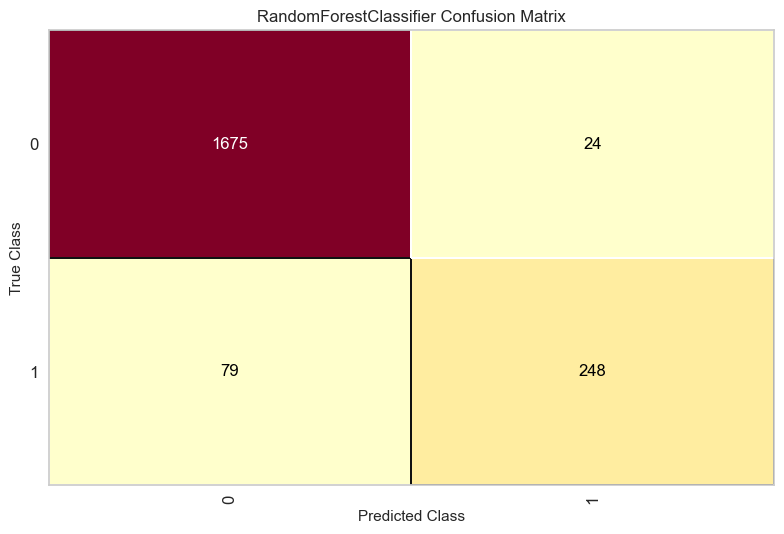

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
cm_random_forest = ConfusionMatrix(test_random_forest)
cm_random_forest.score(X_test, y_test) 
cm_random_forest.show() 

In [39]:
print(classification_report(pred_random_forest, y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1754
           1       0.76      0.91      0.83       272

    accuracy                           0.95      2026
   macro avg       0.87      0.93      0.90      2026
weighted avg       0.96      0.95      0.95      2026



#### 8 - Concluir e Interpretar os Resultados

**1. Classe 0 (Não Churn)**
* Precision (0.99): Das predições feitas como "Não Churn", 99% estavam corretas.
* Recall (0.95): O modelo identificou corretamente 95% dos clientes que realmente não fizeram churn.
* F1-Score (0.97): A métrica F1 combina precisão e recall, e o valor alto de 0.97 indica que o modelo é muito bom em prever clientes que não farão churn.

**2. Classe 1 (Churn)**
* Precision (0.76): Das predições feitas como "churn", 76% estavam corretas.
* Recall (0.91): O modelo conseguiu identificar corretamente 91% dos clientes que realmente fizeram churn.
* F1-Score (0.83): O F1-Score de 0.83 indica um bom equilíbrio entre precisão e recall.

**Acurácia (Accuracy): 0.95**
* Significa que 95% das previsões foram corretas, considerando ambas as classes.

* O objetivo principal do banco é evitar que seus clientes abandonem o uso do cartão de crédito. Portanto, uma métrica crítica a ser observada com atenção é a precisão do modelo ao identificar os clientes que estão prestes a abandonar o serviço. A precisão nesse caso é essencial, pois permite ao banco tomar medidas para reverter a situação e reter o cliente.

* Em nossa análise, o modelo alcançou uma precisão de 91% ao identificar corretamente os clientes que estão abandonaram o serviço. Isso indica que, em 91% dos casos, quando o modelo prevê que um cliente cancelou o serviço, ele está correto. Essa alta precisão é fundamental para as estratégias de retenção.

* Por outro lado, ao prever que um cliente não abandonou o serviço(mas ele de fato abandona), a precisão foi de 76%. Identificar corretamente esses casos é crucial para evitar a perda de clientes que ainda poderiam ser recuperados. Assim, a prioridade deve ser maximizar a precisão do modelo na detecção de clientes em risco de abandono, garantindo ações preventivas mais eficazes.

**Estratégia de Retenção:**
* Identificar clientes com alta probabilidade de churn permite que o banco segmente suas campanhas de marketing e estratégias de retenção de forma mais eficaz. Isso pode incluir ofertas personalizadas, atendimento ao cliente melhorado, ou incentivos específicos para manter esses clientes.
* Usar os dados de churn para desenvolver programas de fidelidade ou serviços melhorados pode ajudar a reduzir a taxa de churn.